 ### Steps:



###  1.Importing the Relevant Libraries  

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from tensorflow.keras.layers import Dropout

### 2.Reading Data 

#### Training Set

In [2]:
Train_data = pd.read_csv("train_file.csv")

#### Test Set

In [3]:
Test_data = pd.read_csv("test_file.csv")

In [4]:
Train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
Test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


### 3.Data Inspection 

In [6]:
print(f"Train_data_shape: {Train_data.shape}\nTest_data_shape: {Test_data.shape}")

Train_data_shape: (50882, 14)
Test_data_shape: (21805, 13)


#### Training Set consist 50882 rows and 14 columns in Train Set whereas Test set consist 21805 rows and 13 columns.

In [7]:
print(f'Train_Data:\n{Train_data.isnull().sum()},\n\n\nTest_Data:\n{Test_data.isnull().sum()}')

Train_Data:
ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64,


Test_Data:
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


In [8]:
Train_data.isnull().sum()/Train_data.shape[0]*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [9]:
Test_data.isnull().sum()/Test_data.shape[0]*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [10]:
Train_data.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

#### categorical & numerical features in Training and Test data set

In [11]:
#categorical features
categorical = Train_data.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= Train_data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 8


Categorical Features in Train Set: 6 &
Numerical Features in Train Set: 8

In [12]:
#categorical features
categorical = Test_data.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= Test_data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 7


Categorical Features in Test Set: 6 &
Numerical Features in Test Set: 7

### 4.Data Cleaning

In [13]:
Train_data['Holding_Policy_Duration']=Train_data['Holding_Policy_Duration'].astype(str)
Test_data['Holding_Policy_Duration']=Train_data['Holding_Policy_Duration'].astype(str)

In [14]:
# To remove '+' sign from 'Holding_Policy_Duration'

%timeit
Train_data['Holding_Policy_Duration']=Train_data['Holding_Policy_Duration'].apply(lambda x: x.strip('+'))

Test_data['Holding_Policy_Duration']=Test_data['Holding_Policy_Duration'].apply(lambda x: x.strip('+'))

In [15]:
#To find the mean of NULL value

Train_data['Holding_Policy_Type'] =Train_data['Holding_Policy_Type'].fillna(Train_data['Holding_Policy_Type'].mean())
Test_data['Holding_Policy_Type'] =Test_data['Holding_Policy_Type'].fillna(Train_data['Holding_Policy_Type'].mean())

In [16]:
Train_data['Holding_Policy_Duration']=Train_data['Holding_Policy_Duration'].astype(float)
Test_data['Holding_Policy_Duration']=Train_data['Holding_Policy_Duration'].astype(float)

In [17]:
#To find the mean of NULL value

Train_data['Holding_Policy_Duration'] =Train_data['Holding_Policy_Duration'].fillna(Train_data['Holding_Policy_Duration'].mean())
Test_data['Holding_Policy_Duration'] =Test_data['Holding_Policy_Duration'].fillna(Train_data['Holding_Policy_Duration'].mean())

In [18]:
Train_data['Holding_Policy_Duration']=Train_data['Holding_Policy_Duration'].astype(int)
Test_data['Holding_Policy_Duration']=Train_data['Holding_Policy_Duration'].astype(int)
Train_data['Holding_Policy_Type']=Train_data['Holding_Policy_Type'].astype(int)
Test_data['Holding_Policy_Type']=Train_data['Holding_Policy_Type'].astype(int)

In [19]:
#To find the mode of NULL value

Train_data['Health Indicator'] =Train_data['Health Indicator'].fillna(Train_data['Health Indicator'].mode()[0])
Test_data['Health Indicator'] =Test_data['Health Indicator'].fillna(Test_data['Health Indicator'].mode()[0])

In [20]:
Train_data['Health Indicator'].replace(['X1','X2','X3','X4','X5','X6','X7','X8','X9'],[1,2,3,4,5,6,7,8,9],inplace =True)
Test_data['Health Indicator'].replace(['X1','X2','X3','X4','X5','X6','X7','X8','X9'],[1,2,3,4,5,6,7,8,9],inplace =True)

In [21]:
 Train_set=Train_data.drop(columns = ['ID','City_Code','Region_Code',], axis='columns')

### 5.Data Pre-process


In [22]:
le = LabelEncoder()

Train_dta= Train_set[['Accomodation_Type','Reco_Insurance_Type','Is_Spouse']].apply(le.fit_transform)



In [23]:
Train_df = Train_set.drop(columns = ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'], axis='columns')

In [24]:
Training_set =  pd.concat([Train_df,Train_dta],axis = 'columns')

In [25]:
Test_set=Test_data.drop(columns = ['ID','City_Code','Region_Code',], axis='columns')

In [26]:
le = LabelEncoder()

Test_dta= Test_set[['Accomodation_Type','Reco_Insurance_Type','Is_Spouse']].apply(le.fit_transform)



In [27]:
Test_df = Test_set.drop(columns = ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'], axis='columns')

In [28]:
Testing_set =  pd.concat([Test_df,Test_dta],axis = 'columns')

### 6.Exploratory Data Analysis 

#### The Below Fig shows Holding Policy Duration Vs Helth Indicator


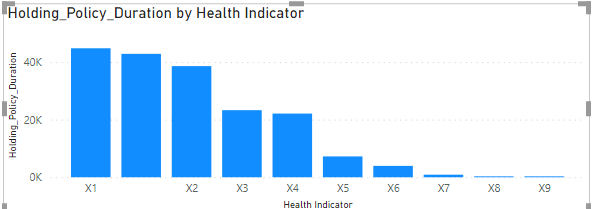

#### The Below Fig shows Holding Policy AND Holding PolicyType Vs Is Spouse

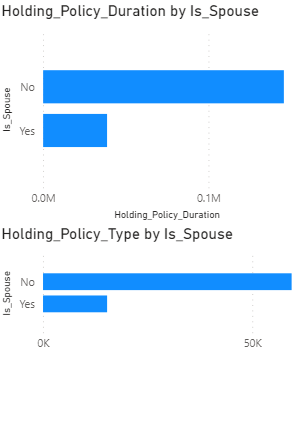

### The Below Fig shows Holding Policy VS Health Indicator

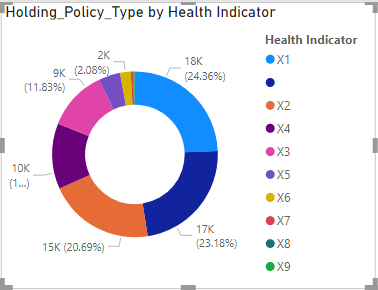

#### The Below Fig shows Holding Policy_Type VS health indicator

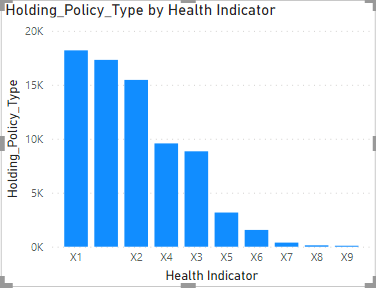

#### The Below Fig shows reco Policy  Premium AND Policy Cat VS Insurence Type

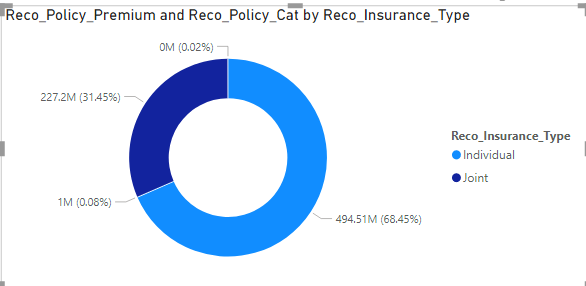

#### The Below Fig shows Responce VS Is_Spouse

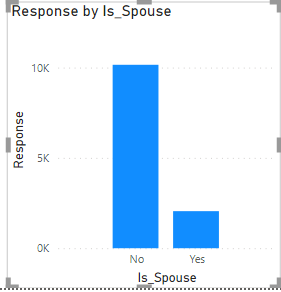

### Splitting the Train Data Set 

In [29]:
X= Training_set.drop(columns = ['Response'], axis=1)
y= Training_set['Response']

In [30]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=32)

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_valid)

### 7.Building Model 

In [32]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 624,kernel_initializer='he_uniform',activation='relu',input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform',activation='relu'))
tf.keras.layers.Dropout( 
    0.5 
) 



classifier.add(Dense(units = 420, kernel_initializer = 'he_uniform',activation='relu'))
tf.keras.layers.Dropout( 
    0.2 
) 
classifier.add(Dense(units = 350, kernel_initializer = 'he_uniform',activation='relu'))
tf.keras.layers.Dropout( 
    0.4
) 
classifier.add(Dense(units = 240, kernel_initializer = 'he_uniform',activation='relu'))
tf.keras.layers.Dropout( 
    0.2 
) 
classifier.add(Dense(units = 150, kernel_initializer = 'he_uniform',activation='relu'))
tf.keras.layers.Dropout( 
    0.2 
) 
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))
tf.keras.layers.Dropout( 
    0.2 
) 
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
tf.keras.layers.Dropout( 
    0.2 
) 
classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))










In [33]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 624)               6864      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               320000    
_________________________________________________________________
dense_2 (Dense)              (None, 420)               215460    
_________________________________________________________________
dense_3 (Dense)              (None, 350)               147350    
_________________________________________________________________
dense_4 (Dense)              (None, 240)               84240     
_________________________________________________________________
dense_5 (Dense)              (None, 150)               36150     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                9

In [35]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.20, batch_size = 32,epochs = 50)

Train on 32564 samples, validate on 8141 samples
Epoch 1/50
32564/32564 [==============================] - 18s 550us/sample - loss: 0.5581 - accuracy: 0.7592 - val_loss: 0.5603 - val_accuracy: 0.7547
Epoch 2/50
32564/32564 [==============================] - 16s 492us/sample - loss: 0.5454 - accuracy: 0.7619 - val_loss: 0.5515 - val_accuracy: 0.7547
Epoch 3/50
32564/32564 [==============================] - 16s 483us/sample - loss: 0.5435 - accuracy: 0.7619 - val_loss: 0.5557 - val_accuracy: 0.7547
Epoch 4/50
32564/32564 [==============================] - 16s 483us/sample - loss: 0.5433 - accuracy: 0.7617 - val_loss: 0.5677 - val_accuracy: 0.7547
Epoch 5/50
32564/32564 [==============================] - 16s 487us/sample - loss: 0.5437 - accuracy: 0.7618 - val_loss: 0.5810 - val_accuracy: 0.7547
Epoch 6/50
32564/32564 [==============================] - 16s 479us/sample - loss: 0.5427 - accuracy: 0.7619 - val_loss: 0.5512 - val_accuracy: 0.7547
Epoch 7/50
32564/32564 [=====================

In [36]:
classifier.evaluate(X_valid,y_valid)

10177/10177 [==============================] - 2s 226us/sample - loss: 0.5529 - accuracy: 0.7585


[0.5529056891654017, 0.758475]

In [37]:
Final =classifier.predict(Testing_set)

In [38]:
Test_id =Test_data['ID']

In [ ]:
Final!D =Final.flatten()

In [39]:
import pandas
df = pandas.DataFrame(data={"col1":Test_id , "col2":Final })
df.to_csv("./finalResult.csv", sep=',',index=False)

Exception: Data must be 1-dimensional